# **Analytics 2 :** <font color=#DF4807>**Topic Modelling**</font>

Your data consists of over 3000 reviews from patients describing the side effects that they face when taking a drug.

In [108]:
import pandas as pd

In [109]:
#Read in wine dataset from url
url = 'https://drive.google.com/file/d/1B7EP1NFlDheUIqkyVJV0p1MjjMWgX3b3/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, sep="\t")
df_sideEffects = df['sideEffectsReview'].dropna().tolist()
print(df_sideEffects)

['Some back pain, some nauseau.', "Drowsiness, a bit of mental numbness. If you take too much, you will feel sedated. Since you have to be able to clearly and honestly assess your emotions and thoughts, determining how much medication you need is tough. I found that 400mg works perfectly for me, but that's a high dose. Less than that and I can feel the medicine wearing off prematurely (I like it to last 24hrs, from sleep to sleep). More than that and I feel numb. Some might call it drowsiness, but it's more a sluggishness of the mind for me.\r\r\n\r\r\nBefore I began treating my bipolar disorder, I used to write a fair amount of fiction. It sort of flowed from me. I definitely had the artist's temperament. After Lamictal, though, that inherent creativity fizzled out. It doesn't come spilling out of me while I'm deep into a manic euphoria. I have to work at art now. It's something that requires discipline. If you are in a field which requires creativity, expect to see a change in your o

Your Tasks:

1. get the optimal number of topics using the log likelihoods as your metric.

2. In each topic, what are the five most important words?

3. What is the most dominant topic throughout the reviews?

4. Look at the original data source df, how accurately were your predicted topics? We can check this by comparing the number of topics to the number of conditions available in our dataset.

## **Bonus question:**

Plot the topics using T-SNE.

Tutorial: https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02

In [110]:
df_sideEffects

['Some back pain, some nauseau.',
 "Drowsiness, a bit of mental numbness. If you take too much, you will feel sedated. Since you have to be able to clearly and honestly assess your emotions and thoughts, determining how much medication you need is tough. I found that 400mg works perfectly for me, but that's a high dose. Less than that and I can feel the medicine wearing off prematurely (I like it to last 24hrs, from sleep to sleep). More than that and I feel numb. Some might call it drowsiness, but it's more a sluggishness of the mind for me.\r\r\n\r\r\nBefore I began treating my bipolar disorder, I used to write a fair amount of fiction. It sort of flowed from me. I definitely had the artist's temperament. After Lamictal, though, that inherent creativity fizzled out. It doesn't come spilling out of me while I'm deep into a manic euphoria. I have to work at art now. It's something that requires discipline. If you are in a field which requires creativity, expect to see a change in your 

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#preparing document term matrix, this will be the input to our lda model
cvectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english", lowercase = True)
cvz = cvectorizer.fit_transform(df_sideEffects)

In [112]:
#Creating vocabulary object
vocab = cvectorizer.get_feature_names_out()
len(vocab)

1538

In [113]:
nTopics = 5 # this is initally arbitrarily set

lda_model = LatentDirichletAllocation(n_components = nTopics, max_iter = 20, random_state = 20)
# n_components = number of topics
# max_iter = max number of epochs for model to train

X_topics = lda_model.fit_transform(cvz) # get topics
topic_words = lda_model.components_

In [114]:
topic_words

array([[ 2.19104888, 16.00352728,  2.67624807, ...,  0.22143317,
         3.17180671,  2.19924263],
       [ 0.20071408,  1.40887383,  0.20000453, ...,  1.19807032,
         0.20000513,  0.20000365],
       [ 0.2034095 ,  1.21056208,  0.20368575, ...,  1.18042915,
         2.22589616,  0.20000362],
       [ 0.20482563,  7.27482252,  1.72005631, ...,  0.20003125,
         0.20000499,  2.20074552],
       [ 0.20000191,  3.1022143 ,  0.20000533, ...,  0.2000361 ,
         0.20228701,  0.20000457]])

In [115]:
import numpy as np

In [116]:
# number of words that we want to print per topic
n_top_words = 5

for i, topic_dist in enumerate(topic_words):

    # sorting according to values
    sorted_topic_dist = np.argsort(topic_dist)

    # get actual words at those indexes from vocab
    actual_topic_words = np.array(vocab)[sorted_topic_dist]

    #get the top 5 topic words for each topic
    actual_topic_words = actual_topic_words[:-(n_top_words+1):-1]
    print ("Topic", str(i+1), actual_topic_words)

#out will be topic and the respective topic words that create a given topic

Topic 1 ['taking' 'day' 'felt' 'time' 'took']
Topic 2 ['effects' 'did' 'drug' 'effect' 'skin']
Topic 3 ['dry' 'mouth' 'skin' 'loss' 'weight']
Topic 4 ['effects' 'did' 'noticed' 'drug' 'mouth']
Topic 5 ['effects' 'pain' 'skin' 'nausea' 'dizziness']


In [117]:
without_data_clean_log_score = lda_model.score(cvz)
without_data_clean_perplexity = lda_model.perplexity(cvz)

In [118]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(cvz))

# Perplexity: Lower the better. A high perplexity score, means results are not that reliable. (Perplexity = exp(-1. * log-likelihood per word))
print("Perplexity: ", lda_model.perplexity(cvz))


Log Likelihood:  -95160.26534777958
Perplexity:  1082.8120021334253


In [119]:
import gensim

In [120]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))  # gensim simple process lowercases and tokenizes, deacc=True removes punctuations

data_words = list(sent_to_words(df_sideEffects))

print(data_words[:2])

[['some', 'back', 'pain', 'some', 'nauseau'], ['drowsiness', 'bit', 'of', 'mental', 'numbness', 'if', 'you', 'take', 'too', 'much', 'you', 'will', 'feel', 'sedated', 'since', 'you', 'have', 'to', 'be', 'able', 'to', 'clearly', 'and', 'honestly', 'assess', 'your', 'emotions', 'and', 'thoughts', 'determining', 'how', 'much', 'medication', 'you', 'need', 'is', 'tough', 'found', 'that', 'mg', 'works', 'perfectly', 'for', 'me', 'but', 'that', 'high', 'dose', 'less', 'than', 'that', 'and', 'can', 'feel', 'the', 'medicine', 'wearing', 'off', 'prematurely', 'like', 'it', 'to', 'last', 'hrs', 'from', 'sleep', 'to', 'sleep', 'more', 'than', 'that', 'and', 'feel', 'numb', 'some', 'might', 'call', 'it', 'drowsiness', 'but', 'it', 'more', 'sluggishness', 'of', 'the', 'mind', 'for', 'me', 'before', 'began', 'treating', 'my', 'bipolar', 'disorder', 'used', 'to', 'write', 'fair', 'amount', 'of', 'fiction', 'it', 'sort', 'of', 'flowed', 'from', 'me', 'definitely', 'had', 'the', 'artist', 'temperament',

In [121]:
import spacy
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        # texts_out.append([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]) #keeping base from of words and filtering out pronouns, -PRON- is the default lemma for pronouns in spaCy

        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags])) #keeping base from of words and filtering out pronouns, -PRON- is the default lemma for pronouns in spaCy
    return texts_out

# Initialize spacy 'en_core_web_sm' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# data_lemmatized = [each.split() for each in data_lemmatized]
print(data_lemmatized[:2])

['back pain nauseau', 'drowsiness bit mental numbness take too much feel sedated able clearly honestly assess emotion thought determine much medication need tough find work perfectly high dose less feel medicine wear prematurely last hrs sleep sleep more feel numb call drowsiness more sluggishness mind before begin treat bipolar disorder use write fair amount fiction sort of flow definitely artist temperament lamictal inherent creativity fizzle doesn come spill deep manic euphoria work art now require discipline field require creativity expect see change output']


In [122]:
#LDA takes the document term frequency as input
vectorizer = CountVectorizer(analyzer='word',
                             min_df=10,                        # word has to occure at least 10 times
                             stop_words='english',             # remove stop words
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=40000,             # max number of uniq words, you can set this if you like
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [123]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,           # Number of topics, set arbitrarilty and optimized with elbow method or grid search
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',  # use batches to train
                                      random_state=100,          # Random state
                                      batch_size= 5,             # number of docs in each learning iteration
                                      evaluate_every = -1,       # how often to evaluate perplexity, this will also increase processing time
                                      n_jobs = -1,               # Use all available processors
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
# dominant_topic = np.argmax(df_document_topic.values, axis=1)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=5, learning_method='online',
                          n_components=20, n_jobs=-1, random_state=100)


In [124]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. A high perplexity score, means results are not that reliable. (Perplexity = exp(-1. * log-likelihood per word))
print("Perplexity: ", lda_model.perplexity(data_vectorized))


Log Likelihood:  -50886.77807640844
Perplexity:  347.60701086673384


In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, return_train_score = True) #return_train_score should be true if you want to store the scores

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25]},
             return_train_score=True)

In [127]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -10892.603883823647
Model Perplexity:  223.01238459194454


In [128]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=5,           # Number of topics, set arbitrarilty and optimized with elbow method or grid search
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',  # use batches to train
                                      random_state=100,          # Random state
                                      batch_size= 5,             # number of docs in each learning iteration
                                      evaluate_every = -1,       # how often to evaluate perplexity, this will also increase processing time
                                      n_jobs = -1,
                                                     learning_decay=0.9               # Use all available processors
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=5, learning_decay=0.9,
                          learning_method='online', n_components=5, n_jobs=-1,
                          random_state=100)


In [129]:
texts = df['sideEffectsReview'].to_numpy()

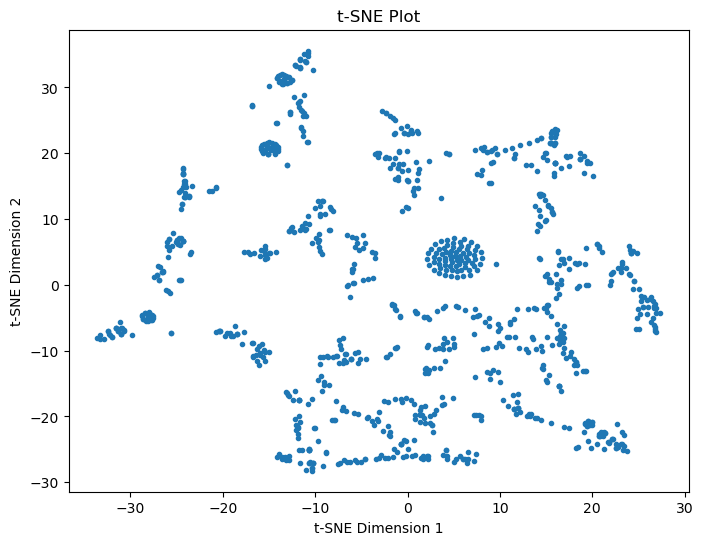

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming lda_output contains the output from your LDA model
# lda_output = ...

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42, init='random')

# Fit and transform the data to 2 dimensions
tsne_data = tsne.fit_transform(lda_output)

# Plot the t-SNE data with color based on lda_output
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], marker='.')
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# plt.colorbar(label='Index of lda_output')
plt.show()


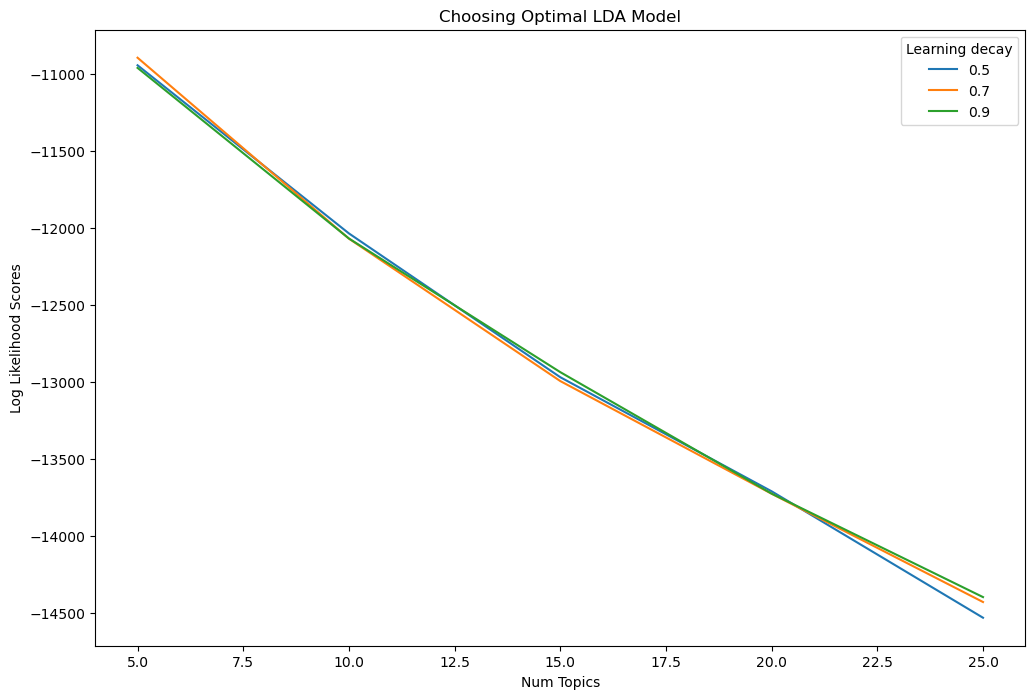

In [131]:
import matplotlib.pyplot as plt

# Get Log Likelihoods from Grid Search Output
n_topics = [5, 10, 15, 20, 25]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()